<a href="https://colab.research.google.com/github/lukexyr/machine-learning/blob/main/Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotheken

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Dataset

In [2]:
# 1. CSV-Daten laden
file_path = "Housing.csv"
data = pd.read_csv(file_path)
data.head(10)
#data.info()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


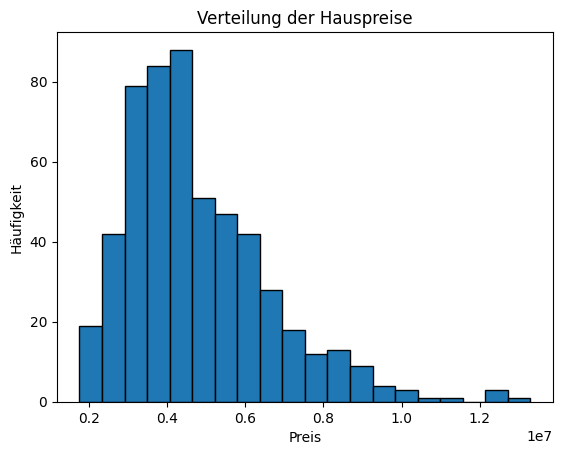

In [3]:
# 1.1 Verteilung der Hauspreise
plt.hist(data['price'],bins=20,edgecolor='black')
plt.title("Verteilung der Hauspreise")
plt.xlabel("Preis")
plt.ylabel('Häufigkeit')
plt.show()

<Axes: >

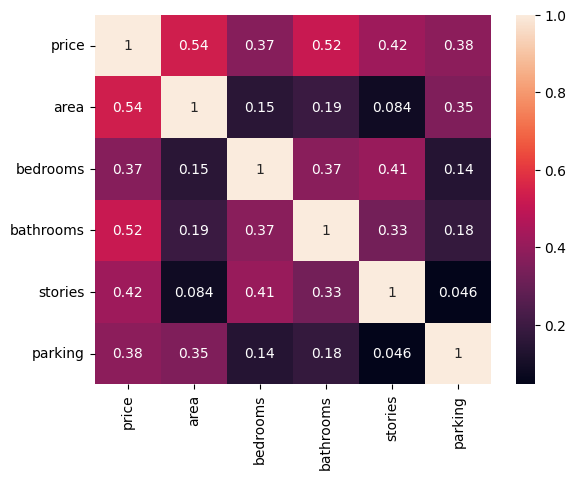

In [4]:
# 1.2 Heatmap, um Korrelationen zwischen numerischen Spalten zu visualisieren
int_cols=data.select_dtypes(include=np.number).columns
sns.heatmap(data[int_cols].corr(),annot=True)

In [5]:
# 2. Zielvariable (price) und Features
X = data.drop(columns=["price"])
y = data["price"]

# 3. Kategoriale und numerische Features identifizieren
categorical_features = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
numerical_features = ["area", "bedrooms", "bathrooms", "stories", "parking"]

In [6]:
# 4. Pipeline für die Datenvorbereitung
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),  # Skalierung numerischer Features
        ("cat", OneHotEncoder(), categorical_features)  # One-Hot-Encoding für kategoriale Features
    ]
)

In [7]:
# 5. Pipeline für Lineare Regression
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Modelltraining und Vorhersage

In [8]:
# 6. Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 7. Modelltraining
model.fit(X_train, y_train)

# 8. Vorhersagen
y_pred = model.predict(X_test)
data_prediction = pd.DataFrame({"Actual Prices": y_test, "Predicted Prices ": y_pred.astype(int)})
data_prediction.head(10)

,Actual Prices,Predicted Prices
316,4060000,5205854
77,6650000,7273501
360,3710000,3073680
90,6440000,4664223
493,2800000,3294734
209,4900000,3505595
176,5250000,5701456
249,4543000,6471953
516,2450000,2797304
426,3353000,2641579


# Modellbewertung

In [12]:
# 9. Modellbewertung
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R²-Score: {r2:.2f}")
# data.describe()

Root Mean Squared Error (RMSE): 1161770.48
R²-Score: 0.68


# Data Visualisierung

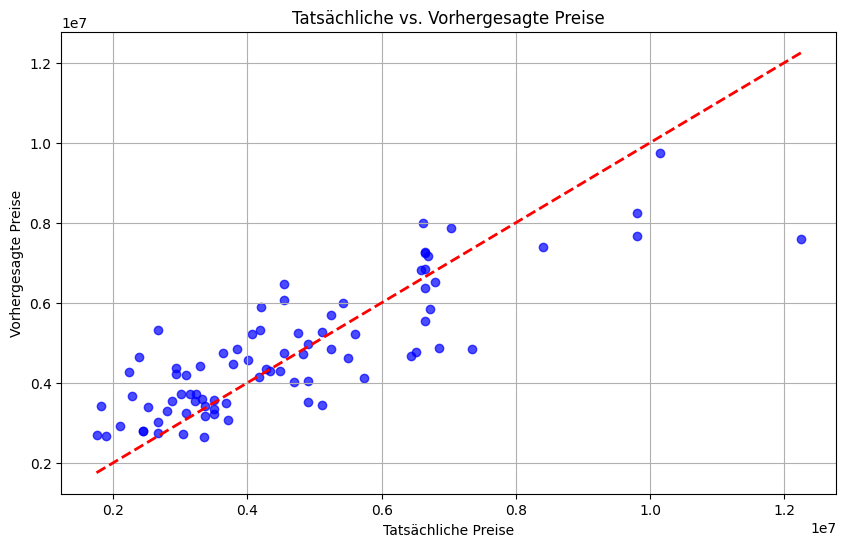

In [10]:
# 10. Visualisierung: Tatsächliche vs. vorhergesagte Preise
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)
plt.xlabel("Tatsächliche Preise")
plt.ylabel("Vorhergesagte Preise")
plt.title("Tatsächliche vs. Vorhergesagte Preise")
plt.grid(True)
plt.show()